In [ ]:
#All bounds tested with 100 digit sequences!

# Token 1: Shannon Entropy. Frequency of each digit
# https://en.wikipedia.org/wiki/Entropy_(information_theory)
# Tested with 100 million trials, 99% Confidence
# Lower Bound:
# 3.1476680283659095
# Upper Bound:
# 3.3090244234934736
# True Value:
# 3.321928094887362 (From equation)

# Token 2: Max Autocorrelation. Highest Recurring Pattern.
# https://en.wikipedia.org/wiki/Autocorrelation
# Tested with 100,000 trials, 99% Confidence
# Lower Bound:
# 0.10574349267887181
# Upper Bound:
# 0.3214106984060025
# True Value:
# 0 (No correlation in a truly random sequence)

# Token 3: Average Autocorrelation. Average "Recurringness".
# https://en.wikipedia.org/wiki/Autocorrelation
# Tested with 100,000 trials, 99% Confidence
# Lower Bound:
# -0.019172159145446704
# Upper Bound:
# 0.015443255686076903
# True Value:
# 0 (No correlation in a truly random sequence)

# Token 4: Number of Runs. Ex: 11111 = Run of 5
# https://en.wikipedia.org/wiki/Run_of_a_sequence
# Tested with 1,000,000 trials, 99% Confidence
# *Lower Bound:
# [66, 2, 0, 0, 0, 0, 0, 0, 0, 0]
# *Upper Bound:
# [94, 15, 4, 1, 1, 0, 0, 0, 0, 0]
# True Value:
# [80.1, 8.01, 0.801, 0.0801, 0.00801, 0.000801...]
# *Note: These were the max and min values for runs across several different runs, compiled into one
# *Read by index: [0] = Run of one count, [3] = Run of 4 count


# Token 5: Average Number of Runs. Ex: 11111 = Run of 5
# https://en.wikipedia.org/wiki/Run_of_a_sequence
# Tested with 1,000,000 trials, 99% Confidence
# *Averages:
# [81.17892, 8.037314, 0.795644, 0.079007, 0.007661, 0.000764, 7.7e-05, 8e-06, 0, 0]
# [80.1, 8.01, 0.801, 0.0801, 0.00801, 0.000801...]
# *Note: These were the max and min values for runs across several different runs, compiled into one
# *Read by index: [0] = Run of one count, [3] = Run of 4 count

In [43]:
#Create a random sequence of x values from 0-9. num is adjustable

def generate_random_sequence(num):
    random_sequence = ""
    for _ in range(num):
        random_digit = random.randint(0, 9)
        random_sequence += str(random_digit)
    return random_sequence

print(generate_random_sequence(1000))

9906542719970780163604992000151491019367695664208884699509739425218736354336065422935620327484096611087475004144372375364351965753058749591568796865670277879887933883205950328368857422140722799881229789238957795203858331180293401555667492425466216424827442792216542353824054962162932766674212244797773169770288269019575173721777485039724192110378318811503590169901025478553639388490818534877680795554243198573335970008124798213516814455369453753241218574048104641605961115863839578048964343311249132666464423383128759476212929085548103070546075620331925853563757757787675396657632016768597120214592264501878421119141207401230298831670031318756157285291222696695296821012660112125016200357263010506340348241643340140947886984195688057777928250474717759081332460883702665937042387432928067547668081790848786220060475490260125047288936937885247076193814876916755577608484107615816870775860789693233114318270025059996228799544168208824339136228911428748770298512936586479392082961373298341566144963671321

In [61]:
import math  # Correct module name (lowercase 'math')

# Function to calculate Shannon Entropy
def entropy(sequence):
    probabilities = []
    for i in range(10):
        probabilities.append(sequence.count(str(i)) / len(sequence))

    entropyval = 0
    for p in probabilities:
        if p > 0:
            entropyval -= p * math.log2(p)  # Use math.log2 to compute logarithm base 2

    return entropyval

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])

# Test case
x = generate_random_sequence(100)
y = '1111111111111111111111111111111111111111111111211111111111111111111111111111111111111111111111111111'

# Output the entropy of a specific sequence
print(entropy(y))  # Should print the Shannon entropy of the sequence `y`


0.08079313589591118


In [ ]:
# Finding the standard entropy for values 0-9
def entropy_range():
    probabilities = [1/10] * 10  # Each number has a frequency of 1/10
    return -sum(p * log2(p) for p in probabilities if p > 0)

entropyval = entropy_range()
print(entropyval)


3.321928094887362


In [ ]:
# Test where the bounds are across 10 million trials of 100 digits
def calculate_entropy_bounds(num_trials=10000000, sequence_length=100):
    entropy_values = []

    # Generate entropy values for multiple random sequences
    for _ in range(num_trials):
        sequence = generate_random_sequence(sequence_length)
        entropy_values.append(entropy(sequence))

    # Calculate the 0.5th and 99.5th percentiles for the 99% confidence interval
    lower_bound = np.percentile(entropy_values, 0.5)
    upper_bound = np.percentile(entropy_values, 99.5)

    return lower_bound, upper_bound

# Example usage
lower_bound, upper_bound = calculate_entropy_bounds()
print(f"99% of the entropy values fall between: {lower_bound} and {upper_bound}")

#99% of the entropy values fall between: 3.1476680283659095 and 3.3090244234934736

#


99% of the entropy values fall between: 3.1476680283659095 and 3.3090244234934736


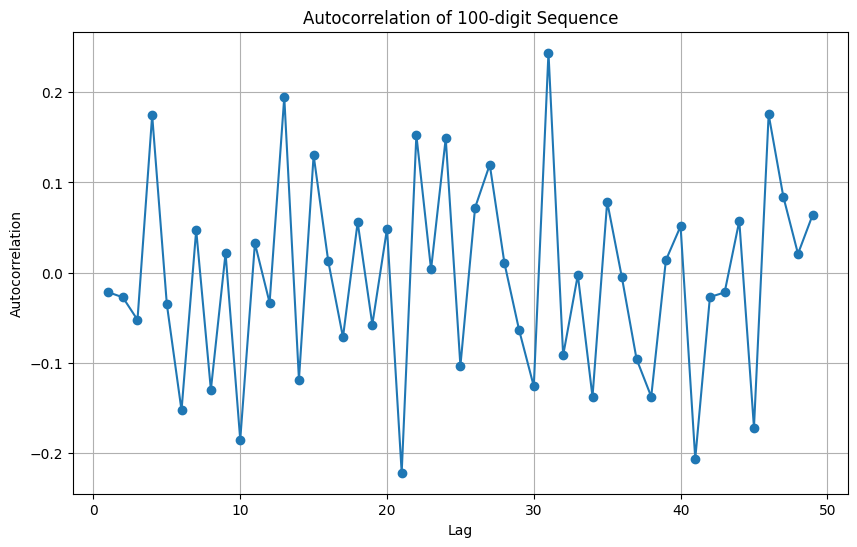

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=10000):
    random_sequence = ''
    for _ in range(length):
        random_sequence += str(random.randint(0, 9))
    return random_sequence

# Function to calculate the autocorrelation at different lags
def autocorrelation(sequence):
    # Convert sequence to a list of integers
    x = []
    for digit in sequence:
        x.append(int(digit))

    # Compute the mean of the sequence
    mean_x = np.mean(x)

    # Compute autocorrelation for various lags (1 to n//2)
    autocorr_values = []
    n = len(x)
    for lag in range(1, n//2):
        # Calculate autocorrelation at lag k
        numerator = 0
        denominator = 0
        for i in range(n - lag):
            numerator += (x[i] - mean_x) * (x[i + lag] - mean_x)
        for i in range(n):
            denominator += (x[i] - mean_x) ** 2
        autocorr_values.append(numerator / denominator)

    return autocorr_values

# Function to plot the autocorrelation
def plot_autocorrelation(sequence):
    autocorr_vals = autocorrelation(sequence)

    plt.figure(figsize=(10, 6))
    lags = []
    for i in range(1, len(autocorr_vals) + 1):
        lags.append(i)
    plt.plot(lags, autocorr_vals, marker='o')
    plt.title('Autocorrelation of 100-digit Sequence')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

# Generate a random 100-digit sequence
sequence = generate_random_sequence(100)

# Calculate and plot autocorrelation
plot_autocorrelation(sequence)


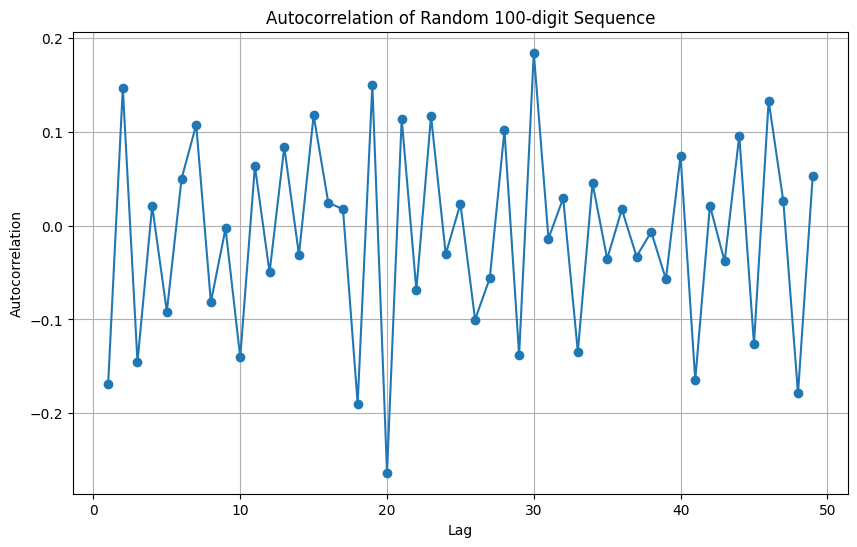

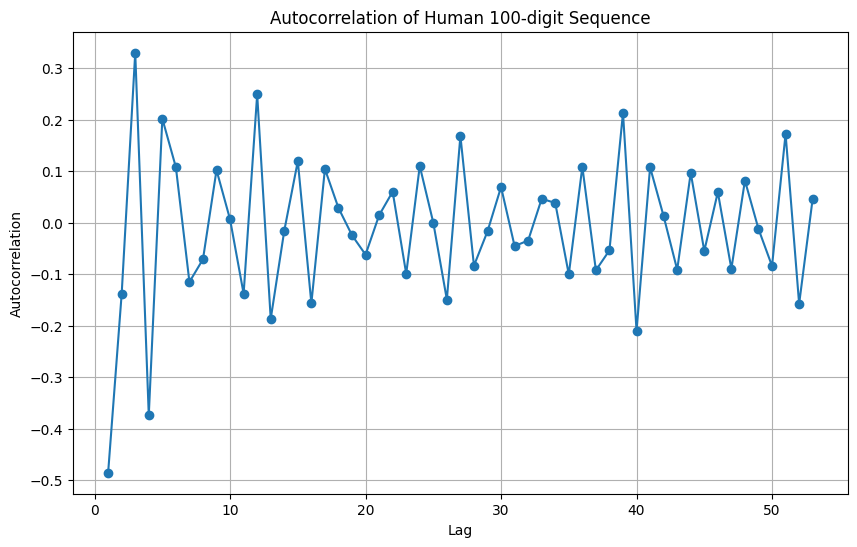

Max Autocorrelation for Random Sequence: 0.18416595902453034
Average Autocorrelation for Random Sequence: -0.010825216094259647
Max Autocorrelation for Human Sequence: 0.32963202301933353
Average Autocorrelation for Human Sequence: -0.009342195009781111


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    random_sequence = ''
    for _ in range(length):
        random_sequence += str(random.randint(0, 9))
    return random_sequence

# Function to create a human-generated sequence with patterns
def generate_human_sequence(length=100):
    # Create a sequence with some common human-like patterns:
    # Repeated digits, alternating digits, and some biases
    human_sequence = ''
    for i in range(length):
        if i % 3 == 0:
            human_sequence += '1'  # Repeated '1's
        elif i % 4 == 0:
            human_sequence += '2'  # Repeated '2's
        else:
            human_sequence += str(random.randint(0, 9))  # Random digits
    return "4403974074092740927409274027409217409409217409237409237409274092740927409237409327409274092472109472094702947"

# Function to calculate the autocorrelation at different lags
def autocorrelation(sequence):
    # Convert sequence to a list of integers
    x = []
    for digit in sequence:
        x.append(int(digit))

    # Compute the mean of the sequence
    mean_x = np.mean(x)

    # Compute autocorrelation for various lags (1 to n//2)
    autocorr_values = []
    n = len(x)
    for lag in range(1, n//2):
        # Calculate autocorrelation at lag k
        numerator = 0
        denominator = 0
        for i in range(n - lag):
            numerator += (x[i] - mean_x) * (x[i + lag] - mean_x)
        for i in range(n):
            denominator += (x[i] - mean_x) ** 2
        autocorr_values.append(numerator / denominator)

    return autocorr_values

# Function to plot the autocorrelation
def plot_autocorrelation(sequence, title):
    autocorr_vals = autocorrelation(sequence)

    plt.figure(figsize=(10, 6))
    lags = []
    for i in range(1, len(autocorr_vals) + 1):
        lags.append(i)
    plt.plot(lags, autocorr_vals, marker='o')
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()

    # Calculate average autocorrelation
    avg_autocorr = np.mean(autocorr_vals)

    return max(autocorr_vals), avg_autocorr

# Generate random and human-generated sequences
random_sequence = generate_random_sequence(100)
human_sequence = generate_human_sequence(100)

# Calculate and plot autocorrelations
max_random_autocorr, avg_random_autocorr = plot_autocorrelation(random_sequence, 'Autocorrelation of Random 100-digit Sequence')
max_human_autocorr, avg_human_autocorr = plot_autocorrelation(human_sequence, 'Autocorrelation of Human 100-digit Sequence')

# Output the max and average autocorrelation values
print(f'Max Autocorrelation for Random Sequence: {max_random_autocorr}')
print(f'Average Autocorrelation for Random Sequence: {avg_random_autocorr}')
print(f'Max Autocorrelation for Human Sequence: {max_human_autocorr}')
print(f'Average Autocorrelation for Human Sequence: {avg_human_autocorr}')


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])

# Function to calculate the autocorrelation at different lags using numpy (vectorized)
def autocorrelation(sequence):
    # Convert sequence to a numpy array of integers
    x = np.array([int(digit) for digit in sequence])

    # Compute the mean of the sequence
    mean_x = np.mean(x)

    # Compute autocorrelation for various lags (1 to n//2) using vectorized operations
    n = len(x)
    autocorr_values = np.zeros(n // 2 - 1)  # Preallocate the array for autocorrelation values

    for lag in range(1, n // 2):
        # Vectorized autocorrelation calculation for lag
        numerator = np.sum((x[:-lag] - mean_x) * (x[lag:] - mean_x))
        denominator = np.sum((x - mean_x) ** 2)
        autocorr_values[lag - 1] = numerator / denominator

    return autocorr_values

# Function to find the positive and negative bounds for max and average autocorrelation (99% confidence)
def find_autocorrelation_bounds(num_sequences=100000, length=100):
    max_autocorr_values = np.zeros(num_sequences)  # Preallocate array for max values
    avg_autocorr_values = np.zeros(num_sequences)  # Preallocate array for avg values

    # Generate multiple random sequences and calculate autocorrelation
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        autocorr_vals = autocorrelation(random_sequence)

        # Store the max and average autocorrelation values
        max_autocorr_values[i] = np.max(autocorr_vals)
        avg_autocorr_values[i] = np.mean(autocorr_vals)

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for max and average autocorrelation
    lower_bound_max = np.percentile(max_autocorr_values, 0.5)
    upper_bound_max = np.percentile(max_autocorr_values, 99.5)

    lower_bound_avg = np.percentile(avg_autocorr_values, 0.5)
    upper_bound_avg = np.percentile(avg_autocorr_values, 99.5)

    return lower_bound_max, upper_bound_max, lower_bound_avg, upper_bound_avg

# Run the function and find bounds for random sequences
lower_bound_max, upper_bound_max, lower_bound_avg, upper_bound_avg = find_autocorrelation_bounds()

# Output the results
print(f"99% Confidence Bounds for Max Autocorrelation of Random Sequences:")
print(f"Lower Bound: {lower_bound_max}")
print(f"Upper Bound: {upper_bound_max}")

print(f"99% Confidence Bounds for Average Autocorrelation of Random Sequences:")
print(f"Lower Bound: {lower_bound_avg}")
print(f"Upper Bound: {upper_bound_avg}")


99% Confidence Bounds for Max Autocorrelation of Random Sequences:
Lower Bound: 0.10574349267887181
Upper Bound: 0.3214106984060025
99% Confidence Bounds for Average Autocorrelation of Random Sequences:
Lower Bound: -0.019172159145446704
Upper Bound: 0.015443255686076903


In [ ]:
def runs_test(sequence):
    runs = []
    current_digit = sequence[0]
    run_length = 1
    for i in range(1, len(sequence)):
        if sequence[i] == current_digit:
            run_length += 1
        else:
            runs.append(run_length)
            current_digit = sequence[i]
            run_length = 1
    runs.append(run_length)  # For the last run

    # Calculate the number of runs of length 1 to 10
    run_lengths = [0] * 10
    for run in runs:
        if run <= 10:
            run_lengths[run - 1] += 1

    # Return the count of runs of lengths 1 to 10
    return run_lengths

# Example: Test with a random sequence of 100 digits
print(runs_test(generate_random_sequence(100)))


[88, 6, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import numpy as np

# Function to generate a random 100-digit sequence using numpy
def generate_random_sequences(length=100, num_sequences=10000000):
    return np.random.randint(0, 10, size=(num_sequences, length))

# Function to perform the runs test on the sequence
def runs_test_batch(sequences):
    # Calculate runs for all sequences at once
    run_lengths = np.zeros((sequences.shape[0], 10), dtype=int)  # Store the counts of runs of length 1 to 10

    for seq_index in range(sequences.shape[0]):
        sequence = sequences[seq_index]
        current_digit = sequence[0]
        run_length = 1
        runs = []

        for i in range(1, len(sequence)):
            if sequence[i] == current_digit:
                run_length += 1
            else:
                runs.append(run_length)
                current_digit = sequence[i]
                run_length = 1
        runs.append(run_length)  # For the last run

        # Update the run_lengths array for this sequence
        for run in runs:
            if run <= 10:
                run_lengths[seq_index, run - 1] += 1

    return run_lengths

# Function to find the 99% confidence bounds for the runs test (for 10,000 trials)
def find_runs_test_bounds(num_trials=1000000, length=100):
    # Generate all random sequences at once using numpy
    sequences = generate_random_sequences(length=length, num_sequences=num_trials)

    # Perform the runs test in batch
    all_run_lengths = runs_test_batch(sequences)

    # Calculate the 0.5th and 99.5th percentiles for each run length (99% confidence)
    lower_bounds = np.percentile(all_run_lengths, 0.5, axis=0)
    upper_bounds = np.percentile(all_run_lengths, 99.5, axis=0)

    return lower_bounds, upper_bounds

# Run the function and find bounds for the runs test
lower_bounds, upper_bounds = find_runs_test_bounds()

# Output the results
print("99% Confidence Bounds for the Runs Test (Counts of Runs of Lengths 1-10):")
for i in range(10):
    print(f"Length {i+1}: Lower Bound: {lower_bounds[i]}, Upper Bound: {upper_bounds[i]}")


99% Confidence Bounds for the Runs Test (Counts of Runs of Lengths 1-10):
Length 1: Lower Bound: 66.0, Upper Bound: 94.0
Length 2: Lower Bound: 2.0, Upper Bound: 15.0
Length 3: Lower Bound: 0.0, Upper Bound: 4.0
Length 4: Lower Bound: 0.0, Upper Bound: 1.0
Length 5: Lower Bound: 0.0, Upper Bound: 1.0
Length 6: Lower Bound: 0.0, Upper Bound: 0.0
Length 7: Lower Bound: 0.0, Upper Bound: 0.0
Length 8: Lower Bound: 0.0, Upper Bound: 0.0
Length 9: Lower Bound: 0.0, Upper Bound: 0.0
Length 10: Lower Bound: 0.0, Upper Bound: 0.0


In [ ]:
n = 100
expected_runs = []
for k in range(1, 11):
    expected_runs.append((n-1) * (1/10)**(k-1) * (9/10))

print(expected_runs)


[89.10000000000001, 8.91, 0.8910000000000002, 0.08910000000000001, 0.008910000000000003, 0.0008910000000000002, 8.910000000000004e-05, 8.910000000000003e-06, 8.910000000000004e-07, 8.910000000000005e-08]


In [ ]:
import numpy as np

# Function to generate a random 100-digit sequence using numpy
def generate_random_sequences(length=100, num_sequences=1000000):
    return np.random.randint(0, 10, size=(num_sequences, length))

# Function to perform the runs test on the sequence
def runs_test_batch(sequences):
    # Calculate the total number of runs for each sequence
    total_runs = np.zeros(sequences.shape[0], dtype=int)  # Store the total number of runs for each sequence

    for seq_index in range(sequences.shape[0]):
        sequence = sequences[seq_index]
        current_digit = sequence[0]
        run_length = 1
        runs = 1  # At least one run exists initially

        for i in range(1, len(sequence)):
            if sequence[i] == current_digit:
                run_length += 1
            else:
                runs += 1  # A new run starts
                current_digit = sequence[i]
                run_length = 1

        total_runs[seq_index] = runs  # Store the total number of runs for this sequence

    return total_runs

# Function to find the 99% confidence bounds for the average number of runs (for 1,000,000 trials)
def find_runs_test_bounds(num_trials=10000, length=100):
    # Generate all random sequences at once using numpy
    sequences = generate_random_sequences(length=length, num_sequences=num_trials)

    # Perform the runs test in batch
    total_runs = runs_test_batch(sequences)

    # Calculate the 0.5th and 99.5th percentiles for the average number of runs (99% confidence)
    lower_bound = np.percentile(total_runs, 0.5)
    upper_bound = np.percentile(total_runs, 99.5)

    # Calculate the mean of total runs for reference
    mean_runs = np.mean(total_runs)

    return mean_runs, lower_bound, upper_bound

# Run the function and find bounds for the runs test
mean_runs, lower_bound, upper_bound = find_runs_test_bounds()

# Output the results
print("99% Confidence Bounds for the Average Number of Runs:")
print(f"Mean Runs: {mean_runs}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


99% Confidence Bounds for the Average Number of Runs:
Mean Runs: 90.1122
Lower Bound: 82.0
Upper Bound: 97.0


In [ ]:
import numpy as np

# Function to generate a random 100-digit sequence using numpy
def generate_random_sequences(length=100, num_sequences=1000000):
    return np.random.randint(0, 10, size=(num_sequences, length))

# Function to perform the runs test on the sequence
def runs_test_batch(sequences):
    # Calculate the number of runs of each length for each sequence
    run_lengths = np.zeros((sequences.shape[0], 10), dtype=int)  # Store counts of runs of length 1 to 10

    for seq_index in range(sequences.shape[0]):
        sequence = sequences[seq_index]
        current_digit = sequence[0]
        run_length = 1
        runs = []

        for i in range(1, len(sequence)):
            if sequence[i] == current_digit:
                run_length += 1
            else:
                runs.append(run_length)
                current_digit = sequence[i]
                run_length = 1
        runs.append(run_length)  # For the last run

        # Update the run_lengths array for this sequence (for each run length 1-10)
        for run in runs:
            if run <= 10:
                run_lengths[seq_index, run - 1] += 1

    return run_lengths

# Function to find the 99% confidence bounds for the average number of runs (for 1,000,000 trials)
def find_runs_test_bounds(num_trials=1000000, length=100):
    # Generate all random sequences at once using numpy
    sequences = generate_random_sequences(length=length, num_sequences=num_trials)

    # Perform the runs test in batch
    run_lengths = runs_test_batch(sequences)

    # Calculate the average number of runs of lengths 1 to 10 across all sequences
    avg_run_lengths = np.mean(run_lengths, axis=0)

    # Calculate the 0.5th and 99.5th percentiles for each run length (99% confidence)
    lower_bounds = np.percentile(run_lengths, 0.5, axis=0)
    upper_bounds = np.percentile(run_lengths, 99.5, axis=0)

    return avg_run_lengths, lower_bounds, upper_bounds

# Run the function and find bounds for the runs test
avg_run_lengths, lower_bounds, upper_bounds = find_runs_test_bounds()

# Output the results
print("99% Confidence Bounds for the Average Number of Runs (1-10):")
for i in range(10):
    print(f"Run Length {i+1}:")
    print(f"  Average: {avg_run_lengths[i]}")
    print(f"  Lower Bound: {lower_bounds[i]}")
    print(f"  Upper Bound: {upper_bounds[i]}")

#avg
#  Average: 81.17892
  Average: 8.037314
  Average: 0.795644
  Average: 0.079007
  Average: 0.007661
  Average: 0.000764
  Average: 7.7e-05
  Average: 8e-06
 Average: 0
 Average: 0

99% Confidence Bounds for the Average Number of Runs (1-10):
Run Length 1:
  Average: 81.17892
  Lower Bound: 66.0
  Upper Bound: 94.0
Run Length 2:
  Average: 8.037314
  Lower Bound: 2.0
  Upper Bound: 15.0
Run Length 3:
  Average: 0.795644
  Lower Bound: 0.0
  Upper Bound: 4.0
Run Length 4:
  Average: 0.079007
  Lower Bound: 0.0
  Upper Bound: 1.0
Run Length 5:
  Average: 0.007661
  Lower Bound: 0.0
  Upper Bound: 1.0
Run Length 6:
  Average: 0.000764
  Lower Bound: 0.0
  Upper Bound: 0.0
Run Length 7:
  Average: 7.7e-05
  Lower Bound: 0.0
  Upper Bound: 0.0
Run Length 8:
  Average: 8e-06
  Lower Bound: 0.0
  Upper Bound: 0.0
Run Length 9:
  Average: 0.0
  Lower Bound: 0.0
  Upper Bound: 0.0
Run Length 10:
  Average: 0.0
  Lower Bound: 0.0
  Upper Bound: 0.0


In [ ]:

# Function to generate random sequences
def generate_random_sequences(length=100, num_sequences=1000000):
    return np.random.randint(0, 10, size=(num_sequences, length))

# Function to perform the runs test on the sequence
def runs_test_batch(sequences):
    # Calculate the number of runs of each length for each sequence
    run_lengths = np.zeros((sequences.shape[0], 10), dtype=int)  # Store counts of runs of length 1 to 10

    for seq_index in range(sequences.shape[0]):
        sequence = sequences[seq_index]
        current_digit = sequence[0]
        run_length = 1
        runs = []

        for i in range(1, len(sequence)):
            if sequence[i] == current_digit:
                run_length += 1
            else:
                runs.append(run_length)
                current_digit = sequence[i]
                run_length = 1
        runs.append(run_length)  # For the last run

        # Update the run_lengths array for this sequence (for each run length 1-10)
        for run in runs:
            if run <= 10:
                run_lengths[seq_index, run - 1] += 1

    return run_lengths

# Function to find the 99% confidence bounds for the average number of runs
def find_runs_test_bounds(num_trials=1000000, length=100):
    # Generate all random sequences at once using numpy
    sequences = generate_random_sequences(length=length, num_sequences=num_trials)

    # Perform the runs test in batch
    run_lengths = runs_test_batch(sequences)

    # Calculate the average number of runs of lengths 1 to 10 across all sequences
    avg_run_lengths = np.mean(run_lengths, axis=0)

    # Calculate the standard deviation for each run length
    std_devs = np.std(run_lengths, axis=0)

    # Calculate the 0.5th and 99.5th percentiles for each run length (99% confidence)
    lower_bounds = np.percentile(run_lengths, 0.5, axis=0)
    upper_bounds = np.percentile(run_lengths, 99.5, axis=0)

    return avg_run_lengths, std_devs, lower_bounds, upper_bounds

# Run the function and find bounds for the runs test
avg_run_lengths, std_devs, lower_bounds, upper_bounds = find_runs_test_bounds()

# Expected averages for each run length (from your simulation results)
expected_run_lengths = [81.17892, 8.037314, 0.795644, 0.079007, 0.007661, 0.000764, 7.7e-05, 8e-06, 0, 0]

# Calculate z-scores for each run length
z_scores = [(avg - expected) / std if std > 0 else 0 for avg, expected, std in zip(avg_run_lengths, expected_run_lengths, std_devs)]

# Output z-scores for each run length
print("Z-Scores for each run length:")
for i in range(10):
    print(f"Run Length {i+1}: Z-Score = {z_scores[i]}")


Z-Scores for each run length:
Run Length 1: Z-Score = -0.0006210911893232779
Run Length 2: Z-Score = 6.732617924077612e-05
Run Length 3: Z-Score = 0.0013561425280910395
Run Length 4: Z-Score = -0.001132750689673578
Run Length 5: Z-Score = 0.0018557725369978764
Run Length 6: Z-Score = -0.0011077268161490197
Run Length 7: Z-Score = 0.0012720540636625868
Run Length 8: Z-Score = 0.0011547074666326694
Run Length 9: Z-Score = 0
Run Length 10: Z-Score = 0


In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])

# Function to compute the average of a sequence of digits
def calculate_average(sequence):
    # Convert sequence to a numpy array of integers
    x = np.array([int(digit) for digit in sequence])

    # Compute and return the average
    return np.mean(x)

# Function to find the positive and negative bounds for average digit (99% confidence)
def find_average_bounds(num_sequences=1000000, length=100):
    avg_values = np.zeros(num_sequences)  # Preallocate array for average values

    # Generate multiple random sequences and calculate averages
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        avg_values[i] = calculate_average(random_sequence)

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for the average values
    lower_bound_avg = np.percentile(avg_values, 2.5)
    upper_bound_avg = np.percentile(avg_values, 97.5)

    return lower_bound_avg, upper_bound_avg

# Run the function and find bounds for the average of random sequences
lower_bound_avg, upper_bound_avg = find_average_bounds()

# Output the results
print(f"99% Confidence Interval for Average of Random Sequences:")
print(f"Lower Bound: {lower_bound_avg}")
print(f"Upper Bound: {upper_bound_avg}")

#3.77
#5.24

###99% Confidence Interval for Average of Random Sequences:
#Lower Bound: 3.94
#Upper Bound: 5.06

99% Confidence Interval for Average of Random Sequences:
Lower Bound: 3.94
Upper Bound: 5.06


In [57]:
import numpy as np
import random
from scipy.stats import chi2

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])
    #return '6938583059580983907489298217409218048094709274093703665983268947370938538593209579832658932750938893'
# Function to calculate the Chi-Square statistic for a sequence of digits
def calculate_chi_square(sequence, expected_freq):
    # Count the frequency of each digit (0-9)
    observed_freq = np.zeros(10)
    for digit in sequence:
        observed_freq[int(digit)] += 1

    # Calculate the Chi-Square statistic
    chi_square = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    return chi_square

# Function to find the positive and negative bounds for Chi-Square statistic (99% confidence)
def find_chi_square_bounds(num_sequences=100000, length=100):
    # Expected frequency for each digit in a truly random sequence (10 possible digits)
    expected_freq = length / 10  # 100 digits divided by 10 possible digits

    chi_square_values = np.zeros(num_sequences)  # Preallocate array for Chi-Square values

    # Generate multiple random sequences and calculate Chi-Square values
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        chi_square_values[i] = calculate_chi_square(random_sequence, expected_freq)

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for Chi-Square values
    lower_bound_chi_square = np.percentile(chi_square_values, 0.5)
    upper_bound_chi_square = np.percentile(chi_square_values, 99.5)

    return lower_bound_chi_square, upper_bound_chi_square

# Run the function and find bounds for the Chi-Square statistic of random sequences
lower_bound_chi_square, upper_bound_chi_square = find_chi_square_bounds()

# Output the results
print(f"99% Confidence Interval for Chi-Square Statistic of Random Sequences:")
print(f"Lower Bound: {lower_bound_chi_square}")
print(f"Upper Bound: {upper_bound_chi_square}")


99% Confidence Interval for Chi-Square Statistic of Random Sequences:
Lower Bound: 1.8
Upper Bound: 23.6


In [44]:
import numpy as np
import random
from scipy.stats import chi2

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])

# Function to calculate the Chi-Square statistic for a sequence of digits
def calculate_chi_square(sequence, expected_freq):
    # Count the frequency of each digit (0-9)
    observed_freq = np.zeros(10)
    for digit in sequence:
        observed_freq[int(digit)] += 1

    # Calculate the Chi-Square statistic
    chi_square = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    return chi_square

# Function to find the positive and negative bounds for Chi-Square statistic (99% confidence)
def find_chi_square_bounds(num_sequences=10000, length=100):
    # Expected frequency for each digit in a truly random sequence (10 possible digits)
    expected_freq = length / 10  # 100 digits divided by 10 possible digits

    chi_square_values = np.zeros(num_sequences)  # Preallocate array for Chi-Square values

    # Generate multiple random sequences and calculate Chi-Square values
    for i in range(num_sequences):
        # Normally, this line generates a random sequence
        # random_sequence = generate_random_sequence(length)

        # Instead of generating random sequences, you can manually insert a poorly generated sequence
        # Example of a poorly generated sequence where '0' appears too many times:
        poor_sequence = '7382546987903487902389064870248390487024789024780792034780897203478070132478002478028074804203478002'  # Poorly generated sequence example
        # Or replace with any sequence you want to test:
        # poor_sequence = '1234567890' * 10  # Or any sequence that you want to check

        chi_square_values[i] = calculate_chi_square(poor_sequence, expected_freq)

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for Chi-Square values
    lower_bound_chi_square = np.percentile(chi_square_values, 0.5)
    upper_bound_chi_square = np.percentile(chi_square_values, 99.5)

    return lower_bound_chi_square, upper_bound_chi_square

# Run the function and find bounds for the Chi-Square statistic of random sequences
lower_bound_chi_square, upper_bound_chi_square = find_chi_square_bounds()

# Output the results
print(f"99% Confidence Interval for Chi-Square Statistic of Random Sequences:")
print(f"Lower Bound: {lower_bound_chi_square}")
print(f"Upper Bound: {upper_bound_chi_square}")

# Now, let's test a poorly generated sequence directly
poor_sequence = '0' * 80 + '1' * 10 + '2' * 10  # Poorly generated example
expected_freq = 100 / 10  # Expected frequency per digit
chi_square_poor_sequence = calculate_chi_square(poor_sequence, expected_freq)

# Output the result for the poorly generated sequence
print(f"\nChi-Square value for the poorly generated sequence: {chi_square_poor_sequence}")

# Check if the poorly generated sequence falls within the 99% confidence interval
if lower_bound_chi_square <= chi_square_poor_sequence <= upper_bound_chi_square:
    print(f"The poorly generated sequence's Chi-Square value is within the 99% confidence interval.")
else:
    print(f"The poorly generated sequence's Chi-Square value is outside the 99% confidence interval.")


99% Confidence Interval for Chi-Square Statistic of Random Sequences:
Lower Bound: 46.0
Upper Bound: 46.0

Chi-Square value for the poorly generated sequence: 560.0
The poorly generated sequence's Chi-Square value is outside the 99% confidence interval.


In [16]:
import numpy as np
import random

# Function to generate a random 100-digit binary sequence (0s and 1s)
def generate_random_sequence(length=100):
    return ''.join([random.choice('01') for _ in range(length)])

# Function to calculate the number of runs (consecutive 0s or 1s) in a sequence
def calculate_runs(sequence):
    runs = 0  # Initialize the run count

    # Start by iterating through the sequence and counting transitions
    for i in range(1, len(sequence)):
        if sequence[i] != sequence[i-1]:  # New run starts when the digit changes
            runs += 1

    # Add 1 to include the initial run, which hasn't been counted yet
    return runs + 1 if len(sequence) > 0 else 0

# Function to find the bounds for the number of runs (99% confidence)
def find_run_bounds(num_sequences=100, length=100):
    run_counts = np.zeros(num_sequences)  # To store the number of runs for each sequence

    # Generate multiple random sequences and calculate the number of runs
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        runs = calculate_runs(random_sequence)
        run_counts[i] = runs

    # Calculate the 2.5% and 97.5% quantiles (99% confidence interval) for number of runs
    lower_bound = np.percentile(run_counts, 2.5)
    upper_bound = np.percentile(run_counts, 97.5)

    return lower_bound, upper_bound

# Run the function and find bounds for the number of runs in random sequences
lower_bound, upper_bound = find_run_bounds()

# Output the results
print(f"99% Confidence Interval for Number of Runs in Random Sequences:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


99% Confidence Interval for Number of Runs in Random Sequences:
Lower Bound: 38.95
Upper Bound: 60.04999999999998


In [11]:
import numpy as np
import random

# Function to generate a random 100-digit sequence (0-9)
def generate_random_sequence(length=100):
    return ''

# Function to convert digits (0-4 -> 0, 5-9 -> 1)
def convert_to_binary_sequence(sequence):
    return ''.join(['0' if int(digit) <= 4 else '1' for digit in sequence])

# Function to calculate the number of runs (consecutive 0s or 1s) in a sequence
def calculate_runs(sequence):
    runs = 1  # Start with 1 run because we have at least one run initially
    for i in range(1, len(sequence)):
        if sequence[i] != sequence[i-1]:  # New run starts when the digit changes
            runs += 1
    return runs

# Function to allow user input (0-9) and calculate runs after converting to binary
def calculate_user_sequence_runs():
    user_sequence = input("Enter your sequence (digits 0-9): ")

    # Check if the input sequence is valid (only contains digits 0-9)
    if not all(char.isdigit() and 0 <= int(char) <= 9 for char in user_sequence):
        print("Invalid sequence! Please make sure the sequence only contains digits 0-9.")
        return

    # Convert the sequence to binary (0-4 -> 0, 5-9 -> 1)
    binary_sequence = convert_to_binary_sequence(user_sequence)

    # Calculate the number of runs for the binary sequence
    runs = calculate_runs(binary_sequence)
    print(f"The binary sequence is: {binary_sequence}")
    print(f"The number of runs in your sequence is: {runs}")

# Function to find the bounds for the number of runs (99% confidence)
def find_run_bounds(num_sequences=100000, length=100):
    run_counts = np.zeros(num_sequences)  # To store the number of runs for each sequence

    # Generate multiple random sequences and calculate the number of runs
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        binary_sequence = convert_to_binary_sequence(random_sequence)
        runs = calculate_runs(binary_sequence)
        run_counts[i] = runs

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for number of runs
    lower_bound = np.percentile(run_counts, 0.5)
    upper_bound = np.percentile(run_counts, 99.5)

    return lower_bound, upper_bound

# Run the function and find bounds for the number of runs in random sequences
lower_bound, upper_bound = find_run_bounds()

# Output the results
print(f"99% Confidence Interval for Number of Runs in Random Sequences:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Allow user to enter their own sequence
calculate_user_sequence_runs()


99% Confidence Interval for Number of Runs in Random Sequences:
Lower Bound: 1.0
Upper Bound: 1.0
Enter your sequence (digits 0-9): 4937493047974930743957853258320472384728894698102724829174982648274824824874307403748237498348937483
The binary sequence is: 0101010001110100100111110011000010010101110111000100101010110101010100100110001000101001011001101010
The number of runs in your sequence is: 65


In [29]:
import numpy as np
import random

# Function to generate a random 100-digit binary sequence (0s and 1s)
def generate_random_sequence(length=100):
    return ''.join([random.choice('01') for _ in range(length)])

# Function to calculate the number of non-runs (transitions from 0 to 1 or 1 to 0) in a sequence
def calculate_non_runs(sequence):
    transitions = 0  # Initialize the transition count

    # Start by iterating through the sequence and counting transitions (0 -> 1 or 1 -> 0)
    for i in range(1, len(sequence)):
        if sequence[i] != sequence[i-1]:  # Count the transition when digits change
            transitions += 1

    return transitions

# Function to find the bounds for the number of non-runs (99% confidence)
def find_non_run_bounds(num_sequences=100, length=100):
    non_run_counts = np.zeros(num_sequences)  # To store the number of non-runs (transitions) for each sequence

    # Generate multiple random sequences and calculate the number of non-runs
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        transitions = calculate_non_runs(random_sequence)
        non_run_counts[i] = transitions

    # Calculate the 2.5% and 97.5% quantiles (99% confidence interval) for the number of non-runs
    lower_bound = np.percentile(non_run_counts, 2.5)
    upper_bound = np.percentile(non_run_counts, 97.5)

    return lower_bound, upper_bound

# Run the function and find bounds for the number of non-runs (transitions) in random sequences
lower_bound, upper_bound = find_non_run_bounds()

# Output the results
print(f"99% Confidence Interval for Number of Non-Runs in Random Sequences:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


99% Confidence Interval for Number of Non-Runs in Random Sequences:
Lower Bound: 39.0
Upper Bound: 60.52499999999999


In [51]:
import numpy as np
import random

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])

# Function to calculate the number of increases in the sequence
def calculate_increases(sequence):
    increases = 0
    for i in range(1, len(sequence)):
        if int(sequence[i]) < int(sequence[i - 1]):  # Check if the current digit is greater than the previous one
            increases += 1
    return increases

# Function to find the upper and lower bounds for the number of increases (99% confidence)
def find_increase_bounds(num_sequences=100000, length=100):
    increase_counts = np.zeros(num_sequences)  # Preallocate array for the number of increases

    # Generate multiple random sequences and calculate the number of increases
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        increases = calculate_increases(random_sequence)
        increase_counts[i] = increases

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for the number of increases
    lower_bound_increases = np.percentile(increase_counts, 0.5)
    upper_bound_increases = np.percentile(increase_counts, 99.5)

    return lower_bound_increases, upper_bound_increases

# Run the function and find bounds for the number of increases in random sequences
lower_bound_increases, upper_bound_increases = find_increase_bounds()

# Output the results
print(f"99% Confidence Interval for Number of Increases in Random Sequences:")
print(f"Lower Bound: {lower_bound_increases}")
print(f"Upper Bound: {upper_bound_increases}")



99% Confidence Interval for Number of Increases in Random Sequences:
Lower Bound: 37.0
Upper Bound: 52.0


In [53]:
def count_increases_and_decreases(sequence):
    increase_count = 0
    decrease_count = 0

    # Iterate through the sequence and compare each digit with the previous one
    for i in range(1, len(sequence)):
        if int(sequence[i]) > int(sequence[i - 1]):
            increase_count += 1
        elif int(sequence[i]) < int(sequence[i - 1]):
            decrease_count += 1

    return increase_count, decrease_count

# Test the function with the given sequence
sequence = "3846343946398483740374983748374837878378743874832748932642379054398657836965739284982469281732173987"
increase_count, decrease_count = count_increases_and_decreases(sequence)

print(f"Increases: {increase_count}")
print(f"Decreases: {decrease_count}")


Increases: 46
Decreases: 53


In [74]:
def total_distance_travelled(sequence):
    # Initialize total distance as 0
    total_distance = 0

    # Iterate over the sequence and calculate the absolute difference between consecutive digits
    for i in range(1, len(sequence)):
        total_distance += abs(int(sequence[i]) - int(sequence[i - 1]))

    return total_distance

# Example Usage
sequence = "4392065293387104833619777104348173873090772267553048675020328443882726495128880853186322298473336844"
print("Total Distance Travelled:", total_distance_travelled(sequence))  # Output should be 20


Total Distance Travelled: 320


In [72]:
import numpy as np
import random

# Function to generate a random 100-digit sequence
def generate_random_sequence(length=100):
    return ''.join([str(random.randint(0, 9)) for _ in range(length)])

# Function to calculate the total distance travelled in the sequence
def total_distance_travelled(sequence):
    total_distance = 0
    for i in range(1, len(sequence)):
        total_distance += abs(int(sequence[i]) - int(sequence[i - 1]))
    return total_distance

# Function to find the upper and lower bounds for the total distance travelled (99% confidence)
def find_distance_travelled_bounds(num_sequences=1000000, length=100):
    distance_counts = np.zeros(num_sequences)  # Preallocate array for the total distance travelled

    # Generate multiple random sequences and calculate the total distance
    for i in range(num_sequences):
        random_sequence = generate_random_sequence(length)
        distance = total_distance_travelled(random_sequence)
        distance_counts[i] = distance

    # Calculate the 0.5% and 99.5% quantiles (99% confidence interval) for the total distance
    lower_bound_distance = np.percentile(distance_counts, 2.5)
    upper_bound_distance = np.percentile(distance_counts, 97.5)

    return lower_bound_distance, upper_bound_distance

# Run the function and find bounds for the total distance travelled in random sequences
lower_bound_distance, upper_bound_distance = find_distance_travelled_bounds()

# Output the results
print(f"99% Confidence Interval for Total Distance Travelled in Random Sequences:")
print(f"Lower Bound: {lower_bound_distance}")
print(f"Upper Bound: {upper_bound_distance}")


#99% Confidence Interval for Total Distance Travelled in Random Sequences:
#Lower Bound: 263.0
#Upper Bound: 395.0
#278, 378

99% Confidence Interval for Total Distance Travelled in Random Sequences:
Lower Bound: 278.0
Upper Bound: 378.0
